In [2]:
import numpy as np
from bokeh.transform import dodge
from seaborn import color_palette
from skimage import io
import re
import pandas as pd
import seaborn as sns
from skimage.measure import regionprops_table
from matplotlib import pyplot as plt
from pathlib import Path
import json
from copy import copy
from pprint import pprint

sns.set_style("darkgrid")

In [3]:
def get_image(configfile, stem):
    with open(configfile) as f:
        config = json.load(f)
        
        for exp in config['experiments']:
            for img in exp['images']:
                if img['stem'] == stem:
                    print(f"{img['stem']}: {img['segment']} {img['detect_spots']}")
                    return img


In [4]:
def plot_intensities(img, title_string):
    fig, ax = plt.subplots(3, 3, figsize=(12, 8))

    # rpoD
    mrna = 'rpoD'
    spots = pd.DataFrame(np.load(img[mrna]['spotsfile']), columns=['z', 'y', 'x', 'intensity', 'filtered_intensity', 'label'])
    spots['in_cell'] = spots.apply(lambda s: False if s['label'] == 0 else True, axis=1)
    palette_binary = {False: 'xkcd:red', True: 'xkcd:light cyan'}
    palette_binary = sns.color_palette("husl", 2)
    
    xmax = 20000
    sns.histplot(spots, x='z', hue='in_cell', palette=palette_binary, multiple="dodge", shrink=0.8, binwidth=1, ax=ax[0][0], legend=False).set(title=f'Spot slice {mrna}')
    sns.histplot(spots, x='intensity', hue='in_cell', palette=palette_binary, multiple="dodge", ax=ax[0][1], legend=False).set(title=f'Spot intensities {mrna}', xlim=(0, xmax))
    sns.histplot(spots, x='filtered_intensity', hue='in_cell', palette=palette_binary, multiple="dodge", ax=ax[0][2], legend=False).set(title=f'Spot filtered intensities {mrna}', xlim=(0, xmax))
    
    # rnlAB
    mrna = 'rnlAB'
    spots = pd.DataFrame(np.load(img[mrna]['spotsfile']), columns=['z', 'y', 'x', 'intensity', 'filtered_intensity', 'label'])
    spots['in_cell'] = spots.apply(lambda s: False if s['label'] == 0 else True, axis=1)
    
    xmax = 8000
    sns.histplot(spots, x='z', hue='in_cell', palette=palette_binary, multiple="dodge", shrink=0.8, binwidth=1, ax=ax[1][0], legend=False).set(title=f'Spots per slice {mrna}')
    sns.histplot(spots, x='intensity', hue='in_cell', palette=palette_binary, multiple="dodge", ax=ax[1][1], legend=False).set(title=f'Spot intensities {mrna}', xlim=(0, xmax))
    sns.histplot(spots, x='filtered_intensity', hue='in_cell', palette=palette_binary, multiple="dodge", ax=ax[1][2], legend=False).set(title=f'Spot filtered intensities {mrna}', xlim=(0, xmax))
    
    # hipBA
    mrna = 'hipBA'
    spots = pd.DataFrame(np.load(img[mrna]['spotsfile']), columns=['z', 'y', 'x', 'intensity', 'filtered_intensity', 'label'])
    spots['in_cell'] = spots.apply(lambda s: False if s['label'] == 0 else True, axis=1)
    
    xmax = 10000
    sns.histplot(spots, x='z', hue='in_cell', palette=palette_binary, multiple="dodge", shrink=0.8, binwidth=1, ax=ax[2][0], legend=False).set(title=f'Spots per slice {mrna}')
    sns.histplot(spots, x='intensity', hue='in_cell', palette=palette_binary, multiple="dodge", ax=ax[2][1], legend=False).set(title=f'Spot intensities {mrna}', xlim=(0, xmax))
    sns.histplot(spots, x='filtered_intensity', hue='in_cell', palette=palette_binary, multiple="dodge", ax=ax[2][2]).set(title=f'Spot filtered intensities {mrna}', xlim=(0, xmax))
    
    fig.suptitle(title_string)
    
    plt.tight_layout();


exp22-GAL_07: True True


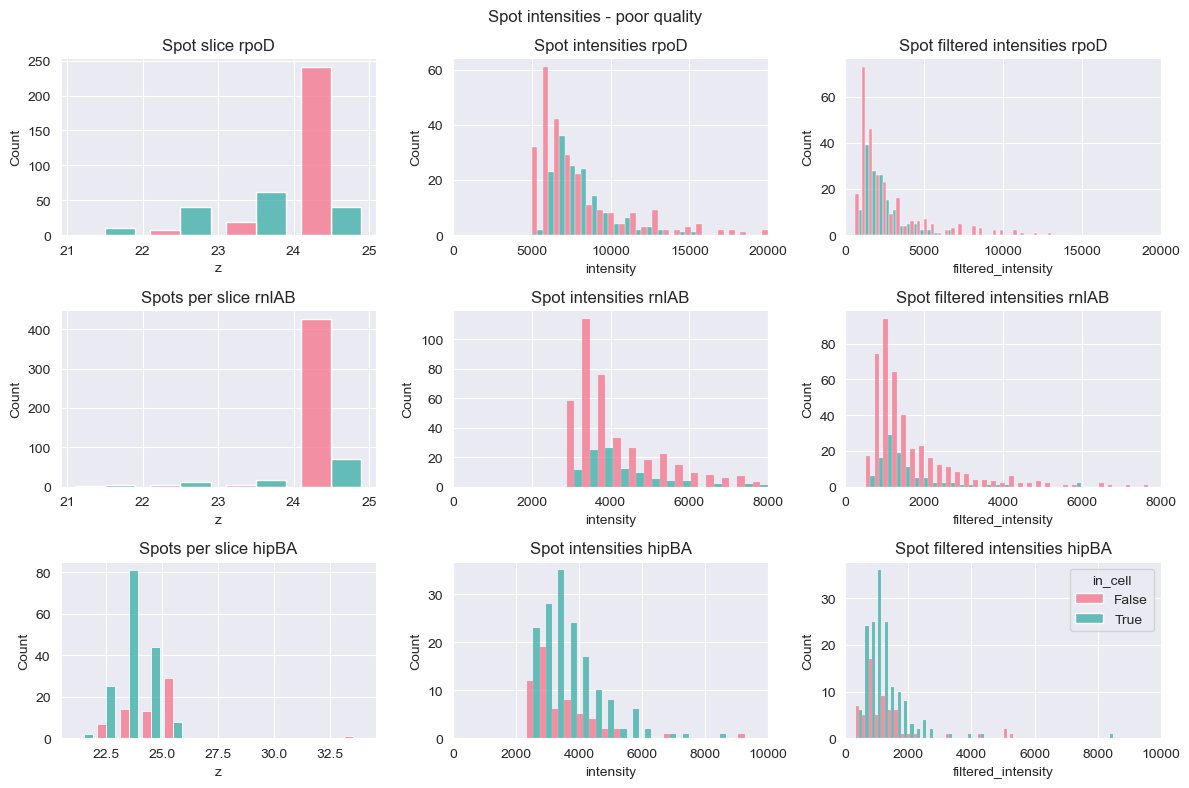

In [5]:
# bad picture
configfile = '/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp22/config-detection-processed.json'
stem = 'exp22-GAL_07' 

img = get_image(configfile, stem)
plot_intensities(img, 'Spot intensities - poor quality')

savestem = "/Users/adele/Master/Projects/persisters/fig/analysis/QC/spot_intensities_bad"
plt.savefig(savestem + ".pdf")

exp22-GLU_02: True True


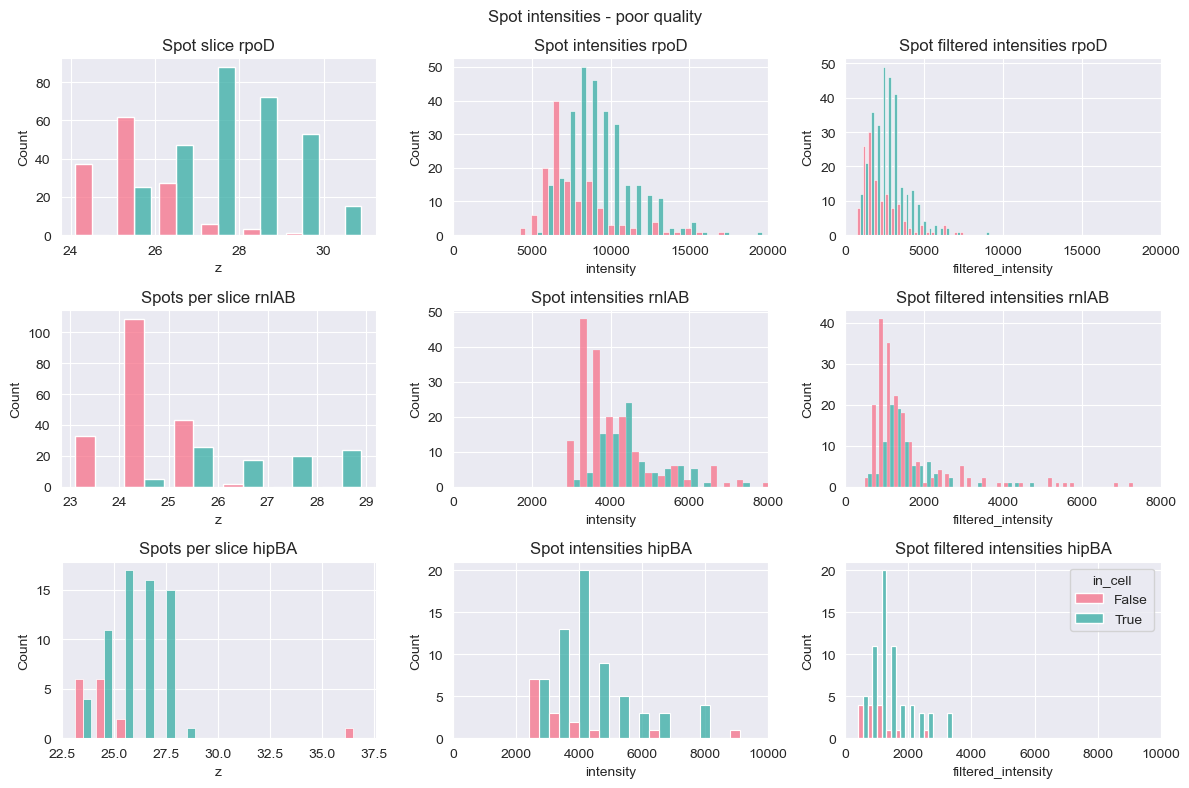

In [12]:
# good picture (good signal but segmentation leaves legit cells out)
configfile = '/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp22/config-detection-processed.json'
stem = 'exp22-GLU_02'  

img = get_image(configfile, stem)
plot_intensities(img, 'Spot intensities - poor quality')

savestem = "/Users/adele/Master/Projects/persisters/fig/analysis/spot_intensities_medium"
plt.savefig(savestem + ".pdf")
plt.savefig(savestem + ".png", dpi=600)
# numbers need to be consistent across images within one condition

MG1655_GLU_OD_0.3_left_02: True True


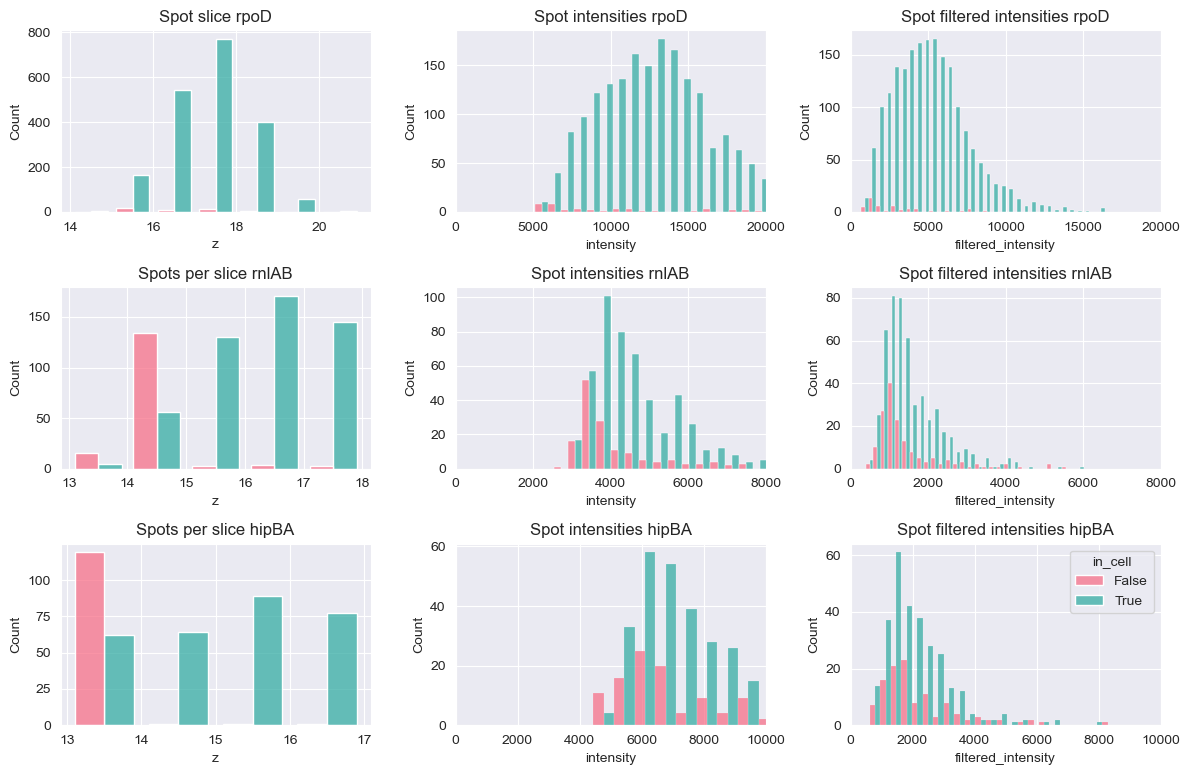

In [13]:
# even better picture (good signal and good segmentation)
configfile = '/Volumes/Flodrive/Florence/smFISH/analysis/20240927-exp16/config-detection-processed.json'
stem = 'MG1655_GLU_OD_0.3_left_02'  

img = get_image(configfile, stem)
plot_intensities(img, '')
savestem = "/Users/adele/Master/Projects/persisters/fig/analysis/spot_intensities_good"
plt.savefig(savestem + ".pdf")


#### The above does not work very well, because:
1. The intensities of the cells that don't have a mask despite being legitimate cells 
count as out-of-cells intensities.
2. Where the DIC is misaligned (top right corner), spots can be erroneously counted as out of cell because they are just outside of the mask.

In [7]:
configfile = '/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp22/config-detection-processed.json'
stem = 'exp22-GLU_09' 
img = get_image(configfile, stem)
img

exp22-GLU_09: True True


{'sourcefile': '/Volumes/Flodrive/Florence/smFISH/data/20241029-exp22/exp22-GLU_09_CY5, CY3.5 NAR, CY3, DAPI.vsi',
 'rootdir': '/Volumes/Flodrive/Florence/smFISH/data/20241029-exp22',
 'basename': 'exp22-GLU_09_CY5, CY3.5 NAR, CY3, DAPI',
 'format': 'vsi',
 'time': {'01-configure': 59.601582765579224,
  '02-segment-DIC': 8.148458003997803,
  '02-segment-DAPI': 3.7229950428009033,
  '03-detect-spots': 116.61101198196411,
  '04-decompose-spots': 47.886855125427246,
  '05-assign-spots': 35.6148419380188},
 'stem': 'exp22-GLU_09',
 'seqnr': '09',
 'dicbasename': 'exp22-GLU_09_DIC.tif',
 'dicfile': '/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp22/exp22-GLU_09/DIC.tif',
 'dicfile_untranslated': '/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp22/exp22-GLU_09/DIC_untranslated.tif',
 'inputdicfile': '/Volumes/Flodrive/Florence/smFISH/data/20241029-exp22/exp22-GLU_09_DIC.tif',
 'cellmaskfile': '/Volumes/Flodrive/Florence/smFISH/analysis/20241029-exp22/exp22-GLU_09/DIC_masks.tif